In [ ]:
pwd

'/content'

ls

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [129]:
!unzip /content/drive/MyDrive/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflat

IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
ls

 179369.pdf                     821319104009-EC8395.pdf
 821319104009-CS8351.pdf        821319104009.EC8691.MPMC.pdf
 821319104009-CS8392.pdf        821319104009-MA8402.pdf
 821319104009-CS8491.pdf        821319104009.OEC552-SC.pdf
 821319104009-CS8492.pdf       '821319104027 CS8451.pdf'
 821319104009-CS8493.pdf       'Colab Notebooks'/
 821319104009-CS8494.pdf       'DINESHKUMAR 821319104009.MA8551.pdf'
 821319104009-CS8501.pdf        flowers/
 821319104009.CS8591-CN.pdf     Flowers-Dataset.zip
 821319104009.CS8592-OOAD.pdf  'Getting started.pdf'


In [ ]:
 pwd

'/content/drive/MyDrive'

In [130]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers/",target_size=(64,64),
                                          class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
  x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,Flatten,MaxPooling2D

creating model

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))


In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                      

compileing the model

In [111]:
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
len(x_test)

180

fit the model

In [112]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


180/180 [==============================] - 64s 350ms/step - loss: 1.6021 - accuracy: 0.2365 - val_loss: 1.5988 - val_accuracy: 0.2437
Epoch 2/10
180/180 [==============================] - 64s 356ms/step - loss: 1.6001 - accuracy: 0.2437 - val_loss: 1.5987 - val_accuracy: 0.2437
Epoch 3/10
180/180 [==============================] - 65s 361ms/step - loss: 1.6003 - accuracy: 0.2432 - val_loss: 1.5986 - val_accuracy: 0.2437
Epoch 4/10
180/180 [==============================] - 63s 350ms/step - loss: 1.5992 - accuracy: 0.2402 - val_loss: 1.5993 - val_accuracy: 0.2437
Epoch 5/10
180/180 [==============================] - 63s 349ms/step - loss: 1.5998 - accuracy: 0.2363 - val_loss: 1.5986 - val_accuracy: 0.2437
Epoch 6/10
180/180 [==============================] - 63s 349ms/step - loss: 1.5997 - accuracy: 0.2372 - val_loss: 1.5989 - val_accuracy: 0.2437
Epoch 7/10
180/180 [==============================] - 64s 357ms/step - loss: 1.5997 - accuracy: 0.2437 - val_loss: 1.5986 - val_accuracy: 0.2

saving the model

In [115]:
model.save('flower.h5')

testing

In [120]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [122]:
model=load_model('flower.h5')

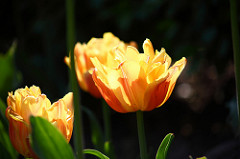

In [134]:
img=image.load_img(r"/content/drive/MyDrive/flowers/tulip/8759597778_7fca5d434b_n.jpg")
img

In [136]:
x=image.img_to_array(img)
x

array([[[ 3.,  3.,  1.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        ...,
        [ 7.,  8.,  3.],
        [ 6.,  7.,  2.],
        [ 7.,  6.,  1.]],

       [[ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        ...,
        [ 7.,  8.,  3.],
        [ 6.,  7.,  2.],
        [ 7.,  6.,  1.]],

       [[ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        ...,
        [ 7.,  8.,  3.],
        [ 6.,  7.,  2.],
        [ 7.,  6.,  1.]],

       ...,

       [[10., 21.,  5.],
        [ 8., 19.,  3.],
        [ 6., 17.,  1.],
        ...,
        [ 8.,  8., 10.],
        [ 9.,  8., 13.],
        [10.,  9., 14.]],

       [[11., 19.,  6.],
        [ 7., 18.,  4.],
        [ 5., 16.,  0.],
        ...,
        [ 8.,  8., 10.],
        [10., 10., 12.],
        [11., 10., 15.]],

       [[11., 19.,  6.],
        [ 9., 17.,  4.],
        [ 5., 16.,  2.],
        ...,
        [ 9.,  9., 11.],
        [11., 11., 13.],
        [12., 11., 16.]]

In [138]:
x=np.expand_dims(x,axis=0)
x

array([[[[[ 3.,  3.,  1.],
          [ 2.,  2.,  0.],
          [ 2.,  2.,  0.],
          ...,
          [ 7.,  8.,  3.],
          [ 6.,  7.,  2.],
          [ 7.,  6.,  1.]],

         [[ 2.,  2.,  0.],
          [ 2.,  2.,  0.],
          [ 2.,  2.,  0.],
          ...,
          [ 7.,  8.,  3.],
          [ 6.,  7.,  2.],
          [ 7.,  6.,  1.]],

         [[ 2.,  2.,  0.],
          [ 2.,  2.,  0.],
          [ 2.,  2.,  0.],
          ...,
          [ 7.,  8.,  3.],
          [ 6.,  7.,  2.],
          [ 7.,  6.,  1.]],

         ...,

         [[10., 21.,  5.],
          [ 8., 19.,  3.],
          [ 6., 17.,  1.],
          ...,
          [ 8.,  8., 10.],
          [ 9.,  8., 13.],
          [10.,  9., 14.]],

         [[11., 19.,  6.],
          [ 7., 18.,  4.],
          [ 5., 16.,  0.],
          ...,
          [ 8.,  8., 10.],
          [10., 10., 12.],
          [11., 10., 15.]],

         [[11., 19.,  6.],
          [ 9., 17.,  4.],
          [ 5., 16.,  2.],
         

In [140]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [156]:
index=['daisy','dandelion','rose','sunflower','tulip']